In [1]:
import pandas as pd

In [2]:
col_names = ["Age", "Blood_Pressure","Specific_Gravity","Albumin","Sugar", "RBC", "Pus_Cell", "Pus_Cell_Clumps",
            "Bacteria", "Blood_Glucose","Blood_Urea", "Serum_Creatinine", "Sodium", "Potassium", "Hemoglobin", "Packed_Cell_Volumne",
            "WBC_Count", "RBC_Count", "Hypertension", "Diabetes_Mellitus","Coronary_Artery_Disease","Appetite","Pedal_Edema","Anemia",
            "Class"]
df = pd.read_csv('Chronic_Kidney_Disease.csv', header=None, sep =',', names=col_names, na_values=['?'])
df

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,RBC,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose,...,Packed_Cell_Volumne,WBC_Count,RBC_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,46.0,90.0,1.010,2.0,0.0,normal,abnormal,notpresent,notpresent,99.0,...,32.0,9100.0,4.1,yes,no,no,good,no,no,ckd
2,55.0,80.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,146.0,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
3,44.0,90.0,1.010,1.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,48.0,NaN,NaN,no,no,no,good,no,no,ckd
4,67.0,70.0,1.020,2.0,0.0,abnormal,normal,notpresent,notpresent,150.0,...,NaN,NaN,NaN,yes,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   RBC                      248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose            356 non-null    float64
 10  Blood_Urea               381 non-null    float64
 11  Serum_Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [4]:
len(df) - len(df.dropna())

242

There would be 242 lines dropped if only the lines without missing values are kept.  That is 60% of the data, too much to lose.   In this case, I will replace the missing vaules with the average or most common.

In [5]:
cat_names = ["RBC", "Pus_Cell", "Pus_Cell_Clumps",
            "Bacteria", "Hypertension", "Diabetes_Mellitus","Coronary_Artery_Disease","Appetite","Pedal_Edema","Anemia",
            "Class"]

In [6]:
num_names = ["Age", "Blood_Pressure","Specific_Gravity","Albumin","Sugar","Blood_Glucose","Blood_Urea", "Serum_Creatinine", "Sodium", "Potassium", "Hemoglobin", "Packed_Cell_Volumne",
            "WBC_Count", "RBC_Count"]

In [7]:
# filling with most common for categorical values and mean for numerical values
df[cat_names] = df[cat_names].apply(lambda x: x.fillna(x.value_counts().index[0]))
df[num_names] = df[num_names].apply( lambda x: x.fillna(x.mean()))


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood_Pressure           400 non-null    float64
 2   Specific_Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   RBC                      400 non-null    object 
 6   Pus_Cell                 400 non-null    object 
 7   Pus_Cell_Clumps          400 non-null    object 
 8   Bacteria                 400 non-null    object 
 9   Blood_Glucose            400 non-null    float64
 10  Blood_Urea               400 non-null    float64
 11  Serum_Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

In [9]:
df['Diabetes_Mellitus'].value_counts()

no      263
yes     136
 yes      1
Name: Diabetes_Mellitus, dtype: int64

In [10]:
df['Diabetes_Mellitus'] = df['Diabetes_Mellitus'].replace({' yes': 'yes'})
df['Diabetes_Mellitus'].value_counts()

no     263
yes    137
Name: Diabetes_Mellitus, dtype: int64

In [11]:
mapping = {'yes': 1,
                'no': 0,
                 'notpresent': 0,
                 'present': 1,
                 'normal': 0,
                 'abnormal': 1,
                 'good': 0,
                 'poor': 1,
                    'notckd': 0,
                  'ckd': 1}


for i in cat_names:
    df[i] = df[i].map(mapping)

df

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,RBC,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose,...,Packed_Cell_Volumne,WBC_Count,RBC_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,...,44.000000,7800.000000,5.200000,1,1,0,0,0,0,1
1,46.0,90.0,1.010,2.0,0.0,0,1,0,0,99.000000,...,32.000000,9100.000000,4.100000,1,0,0,0,0,0,1
2,55.0,80.0,1.010,0.0,0.0,0,0,0,0,146.000000,...,38.884498,8406.122449,4.707435,0,0,0,0,0,0,1
3,44.0,90.0,1.010,1.0,0.0,0,0,0,0,148.036517,...,48.000000,8406.122449,4.707435,0,0,0,0,0,0,1
4,67.0,70.0,1.020,2.0,0.0,1,0,0,0,150.000000,...,38.884498,8406.122449,4.707435,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.000000,...,47.000000,6700.000000,4.900000,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.000000,...,54.000000,7800.000000,6.200000,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.000000,...,49.000000,6600.000000,5.400000,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.000000,...,51.000000,7200.000000,5.900000,0,0,0,0,0,0,0


In [12]:
df_features = df.loc[:,'Age':'Anemia']
df_class = df.loc[:,'Class']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_class,test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [15]:
y_train.value_counts()

1    202
0    118
Name: Class, dtype: int64

In [16]:
y_test.value_counts()

1    48
0    32
Name: Class, dtype: int64

In [17]:
df_train = pd.DataFrame(X_train_std,columns=X_train.columns)
df_train['Class'] = y_train.tolist()
df_train

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,RBC,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose,...,Packed_Cell_Volumne,WBC_Count,RBC_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,1.138594,-0.530377,1.420603,-0.802397,-0.429144,-0.377964,-0.470504,-0.344791,-0.258199,-0.894117,...,0.136441,-1.009547,1.458584,-0.75918,-0.708765,-0.315684,-0.524309,-0.490214,-0.414923,0
1,0.258755,-0.530377,-0.436296,2.332959,0.546495,2.645751,-0.470504,-0.344791,-0.258199,0.811887,...,1.640478,1.566506,1.093963,-0.75918,-0.708765,-0.315684,-0.524309,-0.490214,-0.414923,1
2,-0.386460,-1.349823,0.492154,-0.802397,-0.429144,-0.377964,-0.470504,-0.344791,-0.258199,-0.438314,...,0.512451,0.297704,1.337044,-0.75918,-0.708765,-0.315684,-0.524309,-0.490214,-0.414923,0
3,0.669347,1.927963,-1.364745,0.765281,1.522135,-0.377964,-0.470504,-0.344791,3.872983,1.723492,...,0.136441,0.528395,-0.607599,1.31721,-0.708765,3.167725,-0.524309,-0.490214,-0.414923,1
4,0.200099,0.289070,-1.364745,-0.802397,-0.429144,-0.377964,-0.470504,-0.344791,-0.258199,-0.021581,...,-0.003372,-0.007530,0.009138,-0.75918,-0.708765,-0.315684,-0.524309,-0.490214,-0.414923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.376067,0.289070,0.492154,-0.802397,-0.429144,-0.377964,-0.470504,-0.344791,-0.258199,-0.620635,...,1.389805,-0.663510,2.187825,-0.75918,-0.708765,-0.315684,-0.524309,-0.490214,-0.414923,0
316,-0.914364,0.289070,-1.364745,-0.802397,-0.429144,-0.377964,-0.470504,-0.344791,-0.258199,-0.581566,...,-0.364904,0.143910,0.009138,-0.75918,-0.708765,-0.315684,-0.524309,-0.490214,-0.414923,1
317,0.786658,-0.530377,-0.436296,-0.018558,-0.429144,-0.377964,-0.470504,-0.344791,-0.258199,0.720726,...,-0.364904,-1.317135,-0.729140,1.31721,1.410905,-0.315684,1.907271,2.039924,-0.414923,1
318,-0.973019,-0.000271,0.492154,-0.802397,-0.429144,-0.377964,-0.470504,-0.344791,-0.258199,-0.633658,...,1.139132,-1.317135,0.607803,-0.75918,-0.708765,-0.315684,-0.524309,-0.490214,-0.414923,0


In [18]:
# Separate majority and minority classes
df_train_majority = df_train.loc[df_train['Class']==1,:] # rows with outcome  = 0
df_train_minority = df_train.loc[df_train['Class']==0,:] # rows with outcome = 1
print("Shape of unbalanced training set")
print('majority class',df_train_majority.shape) 
print('minority class',df_train_minority.shape) 

Shape of unbalanced training set
majority class (202, 25)
minority class (118, 25)


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='not majority', k_neighbors=5)
X_train_smote, y_train_smote = sm.fit_resample(X_train_std, y_train) # note X_train_std is the scaled feature data
print("Size of New training data after SMOTE")
print(X_train_smote.shape)
print(y_train_smote.shape)
print("Class distribution after SMOTE")
print(y_train_smote.value_counts())

Size of New training data after SMOTE
(404, 24)
(404,)
Class distribution after SMOTE
0    202
1    202
Name: Class, dtype: int64


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
rf = RandomForestClassifier()
param_grid1 = {
    'max_features': ['log2', 'sqrt'],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_smote = GridSearchCV(estimator = rf, param_grid = param_grid1, scoring='balanced_accuracy', cv = 5, verbose = 1)
grid_search_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='balanced_accuracy', verbose=1)

In [22]:
best_model = grid_search_smote.best_estimator_
grid_search_smote.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [23]:
from sklearn.metrics import classification_report
from sklearn import metrics

print("\n=====================================================================")
print("Prediction results on test set - model trained on SMOTE train set")

y_pred = grid_search_smote.predict(X_test_std)
print(classification_report(y_test,y_pred))


Prediction results on test set - model trained on SMOTE train set
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.98      1.00      0.99        48

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [24]:
import shap

In [25]:
explainer = shap.Explainer(best_model, 
                           algorithm = 'auto') 
shap_values = explainer(X_test_std)

In [26]:
shap_values.shape

(80, 24, 2)

The `shap_values` is of shape (80, 24, 2)
- 80 represents the number of instances in the test set, 24 is the number of features, 2 is the number of classes.

## Global interpretation of the model 

- `summary_plot` plots the aggregated/summary of the feature contribution for all the instances in the test set. 
- The `x-axis` indicates the shap values.
- Red color indicates higher value of the feature, Blue color indicates lower value.
- For a feature, the density of dots represent the density of data points.
- The most important feature is placed at the top.

#### `shap` values summary plot for class 0

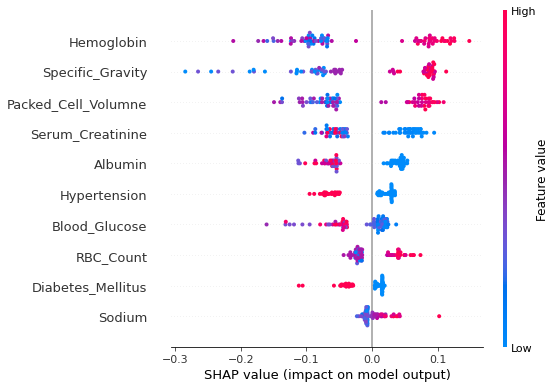

In [27]:
shap.summary_plot(shap_values[:,:,0],
                  feature_names=df_features.columns, # Names of the features (length # features)
                  max_display=10) # How many top features to include in the plot

- `Hemoglobin` has the highest importance.
- For Specific Gravity, Hemoglobin, Packed Cell Volume, RBC count, and Sodium, higher values of the features lead to positive contribution (higher shap values) to class label 0 (notckd) prediction 
- For Serum Creatinine, Albumin, Hypertension, Diabetes Mellitus and Blood Glucose, lower values of the features lead to positive contribution (higher shap values) to class label 0 (notckd) prediction 

#### `shap` values summary plot for class 1

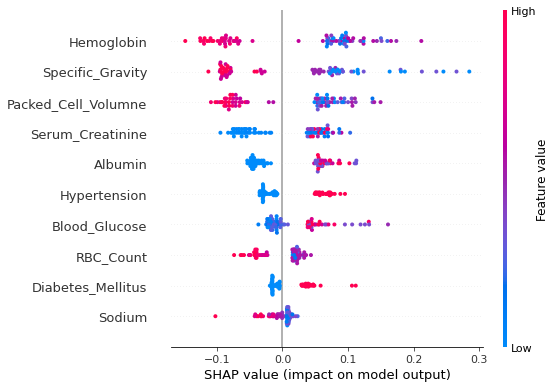

In [28]:
shap.summary_plot(shap_values[:,:,1],
                  feature_names=df_features.columns, # Names of the features (length # features)
                  max_display=10) # How many top features to include in the plot

- `Hemoglobin` has the highest importance.
- For Specific Gravity, Hemoglobin, Packed Cell Volume, RBC count, and Sodium, lower values of the features lead to positive contribution (higher shap values) to class label 1 (ckd) prediction 
- For Serum Creatinine, Albumin, Hypertension, Diabetes Mellitus and Blood Glucose, higher values of the features lead to positive contribution (higher shap values) to class label 1 (ckd) prediction 

In [29]:
from sklearn.feature_selection import RFECV
rf = RandomForestClassifier(max_features='log2',n_estimators=100)

rfe_rf = RFECV(estimator=rf,cv=5,importance_getter='auto',scoring='balanced_accuracy',step=1,min_features_to_select=1,verbose=0)
rfe_rf.fit(X_train_smote,y_train_smote)

RFECV(cv=5, estimator=RandomForestClassifier(max_features='log2'),
      scoring='balanced_accuracy')

In [30]:
print("Optimal number of features : ", rfe_rf.n_features_)
print("optimal features selected ",rfe_rf.ranking_)

Optimal number of features :  13
optimal features selected  [ 1  4  1  1  5  7  8 10 11  1  1  1  1  2  1  1  3  1  1  1 12  1  6  9]


The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.


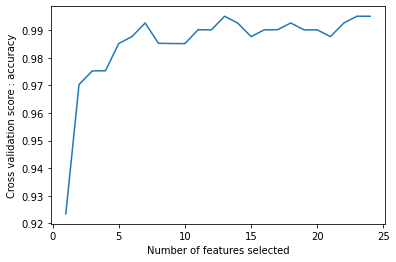

In [33]:
import matplotlib.pyplot as plt
cross_val_scores = rfe_rf.grid_scores_.mean(axis=1)
plt.plot(range(1, 25), cross_val_scores)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score : accuracy")
plt.show()

The optimal number of features is 13

In [48]:
feature_names = df_features.columns
df3 = pd.DataFrame({'feature_names': feature_names, 'feature_importance': rfe_rf.ranking_})
top_features = df3[df3.feature_importance == 1]['feature_names'].values.tolist()
top_features

['Age',
 'Specific_Gravity',
 'Albumin',
 'Blood_Glucose',
 'Blood_Urea',
 'Serum_Creatinine',
 'Sodium',
 'Hemoglobin',
 'Packed_Cell_Volumne',
 'RBC_Count',
 'Hypertension',
 'Diabetes_Mellitus',
 'Appetite']

In [49]:
df_13 = df.loc[:,top_features]

In [50]:
df_features = df_13
df_class = df.loc[:,'Class']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df_class,test_size=0.2)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
df_train = pd.DataFrame(X_train_std,columns=X_train.columns)
df_train['Class'] = y_train.tolist()
df_train

,Age,Specific_Gravity,Albumin,Blood_Glucose,Blood_Urea,Serum_Creatinine,Sodium,Hemoglobin,Packed_Cell_Volumne,RBC_Count,Hypertension,Diabetes_Mellitus,Appetite,Class
0,-0.629692,0.496870,-0.807354,-0.301515,-0.411414,-0.564063,0.349962,1.559306,0.273838,1.443648,-0.764303,-0.748983,-0.5,0
1,0.701159,-1.365228,-0.807354,-0.549930,-0.899961,0.057093,-0.067206,0.104683,-0.088643,0.007465,-0.764303,-0.748983,-0.5,1
2,0.411844,0.496870,-0.807354,-0.467125,-0.730032,-0.438448,0.181153,1.013822,1.844591,0.239367,-0.764303,-0.748983,-0.5,0
3,-0.571829,0.496870,-0.807354,-0.674138,-0.793755,-0.589186,0.349962,0.504704,0.636320,0.961936,-0.764303,-0.748983,-0.5,0
4,1.048338,-0.434179,2.346230,-0.398121,1.436569,0.616720,-0.325273,-0.186242,-0.209470,3.972636,1.308382,-0.748983,-0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.296117,0.496870,-0.807354,-0.577532,-0.177761,-0.413325,2.038049,1.159285,0.636320,1.804932,-0.764303,-0.748983,-0.5,0
316,1.395517,-0.434179,-0.018958,-0.756943,-0.602585,-0.262586,-0.831699,-0.804456,-0.813606,0.007465,1.308382,-0.748983,-0.5,1
317,-0.687556,-0.434179,1.557834,1.464991,1.967598,2.274842,-1.000507,-0.586263,-0.934433,-1.567053,1.308382,1.335144,2.0,1
318,0.701159,0.014201,-0.005596,-0.467125,0.778092,1.119181,-0.156464,-1.677230,-2.142704,0.007465,1.308382,1.335144,-0.5,1


In [52]:
# Separate majority and minority classes
df_train_majority = df_train.loc[df_train['Class']==1,:] # rows with outcome  = 0
df_train_minority = df_train.loc[df_train['Class']==0,:] # rows with outcome = 1
print("Shape of unbalanced training set")
print('majority class',df_train_majority.shape) 
print('minority class',df_train_minority.shape) 

Shape of unbalanced training set
majority class (203, 14)
minority class (117, 14)


In [53]:
sm = SMOTE(sampling_strategy='not majority', k_neighbors=5)
X_train_smote, y_train_smote = sm.fit_resample(X_train_std, y_train) # note X_train_std is the scaled feature data
print("Size of New training data after SMOTE")
print(X_train_smote.shape)
print(y_train_smote.shape)
print("Class distribution after SMOTE")
print(y_train_smote.value_counts())

Size of New training data after SMOTE
(406, 13)
(406,)
Class distribution after SMOTE
0    203
1    203
Name: Class, dtype: int64


In [54]:
rf = RandomForestClassifier()
param_grid1 = {
    'max_features': ['log2', 'sqrt'],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_smote = GridSearchCV(estimator = rf, param_grid = param_grid1, scoring='balanced_accuracy', cv = 5, verbose = 1)
grid_search_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='balanced_accuracy', verbose=1)

In [55]:
best_model = grid_search_smote.best_estimator_
grid_search_smote.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [56]:
from sklearn.metrics import classification_report
from sklearn import metrics

print("\n=====================================================================")
print("Prediction results on test set - model trained on SMOTE train set")

y_pred = grid_search_smote.predict(X_test_std)
print(classification_report(y_test,y_pred))


Prediction results on test set - model trained on SMOTE train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        47

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



After training again with only the top 13 features, the best 'max_features' parameter changed from 'log2' to 'sqrt'.  The best 'n_estimaters' stayed the same at '100'.  The accuracy increased from .99 to 1

In [57]:
explainer = shap.Explainer(best_model, 
                           algorithm = 'auto') 
shap_values = explainer(X_test_std)
shap_values.shape

(80, 13, 2)

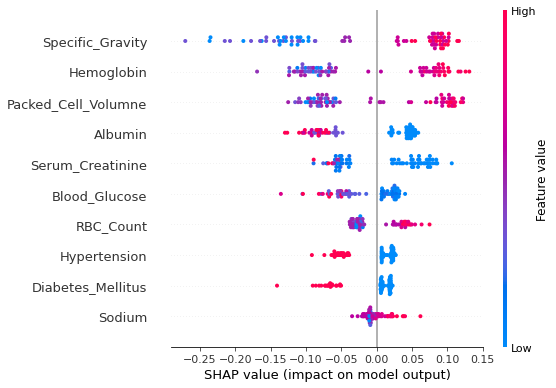

In [58]:
shap.summary_plot(shap_values[:,:,0],
                  feature_names=df_features.columns, # Names of the features (length # features)
                  max_display=10) # How many top features to include in the plot

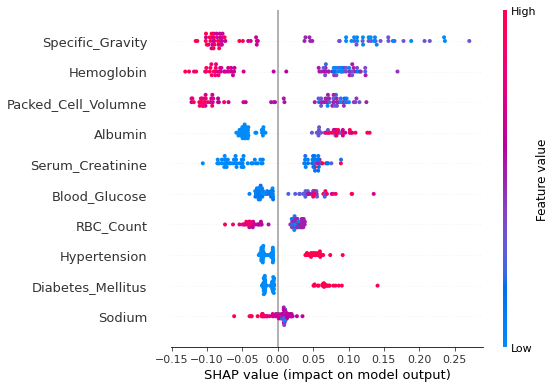

In [59]:
shap.summary_plot(shap_values[:,:,1],
                  feature_names=df_features.columns, # Names of the features (length # features)
                  max_display=10) # How many top features to include in the plot

The top 3 features are the same, except Specific Gavity is now on top and Hemoglobin took it's place in 2nd.